In [18]:
import scipy.io
import numpy as np
import CMR_IA as cmr
import matplotlib.pyplot as plt
import pickle
from statistics import mean, stdev
import pprint
import time
import pandas as pd
import seaborn as sns

np.set_printoptions(edgeitems=20, linewidth=150,precision=4)

In [19]:
# get wordfreq quantile
with open('../simu4_recog_wfe/simu4_data/simu4_word_freq.pkl', 'rb') as inp:
    df = pickle.load(inp)

In [20]:
with open("../simu4_recog_wfe/simu4_data/simu4_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)

In [21]:
s_mat = np.load('../simu4_recog_wfe/simu4_data/simu4_smat.npy')

In [22]:
params = cmr.make_default_params()
params.update(
    beta_enc=0.55,
    beta_cue=0.1,
    beta_distract=0.2,
    gamma_fc=0.14,
    s_fc=0.1,
    c_thresh_itm=-0.039,
    m=19.95,
    n=-1.35,
    c1=2.2,
    use_new_context=True,
)
params

{'beta_enc': 0.55,
 'beta_rec': 0.5,
 'beta_cue': 0.1,
 'beta_rec_post': 0.5,
 'beta_distract': 0.2,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.1,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.5,
 'c_thresh_itm': -0.039,
 'c_thresh_ass': 0.5,
 'd_ass': 1,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 19.95,
 'n': -1.35,
 'c1': 2.2,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.14,
 'gamma_cf': 0.5,
 'use_new_context': True}

### Test phi_att

In [23]:
# df_study = df_study.loc[df_study.session < 1]
# # df_study

# df_test = df_test.loc[df_test.session < 1]
# # df_test

In [24]:
# # 100 sessions loop
# # beta_choice = np.arange(0.01,1,0.01)
# beta_choice = np.arange(0,20,0.5)
# s_new = []
# s_old = []
# for b in beta_choice:
#     # params.update(beta_enc=b)
#     # params.update(gamma_fc=b)
#     params.update(n=b)
#     df_simu = cmr.run_norm_recog_multi_sess(params,df_study,df_test,s_mat)
#     df_simu = df_simu.merge(df_test,on=['session','itemno'])
#     new, old = df_simu.groupby("old").csim.mean().to_numpy()
#     s_new.append(new)
#     s_old.append(old)
# df_exp = pd.DataFrame({'beta_choice':beta_choice, 's_new':np.array(s_new), 's_old':np.array(s_old)})
# df_exp

In [25]:
# fig, ax = plt.subplots()
# sns.lineplot(data=df_exp, x='beta_choice',y='s_old',ax=ax,label='old')
# sns.lineplot(data=df_exp, x='beta_choice',y='s_new',ax=ax,label='new')
# plt.xlabel("beta_enc")
# plt.ylabel("mean context similarity")
# plt.legend()
# plt.savefig('fig/simu4_beta.pdf')

In [26]:
# fig, ax = plt.subplots()
# sns.lineplot(data=df_exp, x='beta_choice',y='s_old',ax=ax,label='old')
# sns.lineplot(data=df_exp, x='beta_choice',y='s_new',ax=ax,label='new')
# plt.xlabel("phi_att")
# plt.ylabel("mean context similarity")
# plt.legend()
# # plt.savefig('fig/simu4_att.pdf')

### Test m and n on att_vec

In [27]:
df_study = df_study.loc[df_study.session < 1]
df_study

,itemno,item,itemno_old,freq,quantile,session
0,316,FARM,552,1161,8,0
1,477,LEOPARD,812,118,3,0
2,433,INSTRUCTOR,741,78,2,0
3,87,BOTTLE,153,1479,8,0
4,84,BOOT,150,149,3,0
...,...,...,...,...,...,...
95,249,CUSTARD,429,54,1,0
96,85,BOOTH,151,154,3,0
97,71,BIRD,129,752,7,0
98,774,SHOE,1288,249,5,0


In [28]:
df_test = df_test.loc[df_test.session < 1]
df_test

,itemno,item,itemno_old,freq,quantile,session,old
0,341,FORT,595,411,6,0,True
1,512,MANSION,864,156,3,0,True
2,66,BENCH,121,345,6,0,True
3,386,GUARD,667,658,7,0,False
4,57,BEE,112,185,4,0,True
...,...,...,...,...,...,...,...
195,960,WHEAT,1602,527,7,0,True
196,518,MATCH,878,775,7,0,True
197,623,PENCIL,1042,276,5,0,True
198,556,MULE,931,82,2,0,True


In [29]:
# df_test = df_test.loc[df_test.session < 1]
# df_test = df_test.iloc[0:10]

In [30]:
# rng = np.random.default_rng(seed=42)
# study_idx = rng.choice(df_test.index, 5, replace = False)
# df_study = df_test.iloc[study_idx]
# df_study.drop(labels='old', axis=1 ,inplace=True)
# df_study

In [31]:
# df_test['old'] = np.isin(df_test.index, study_idx)
# df_test

In [32]:
# # 10 trials loop
# # beta_choice = np.array([0,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
# beta_choice = np.arange(0,1.01,0.05)
# s_new = []
# s_old = []
# for b in beta_choice:
#     params.update(beta_enc=b)
#     model = cmr.CMR2(params, pres_mat, sem_mat, source_mat=None,
#            rec_mat=None, ffr_mat=None, cue_mat=cue_mat, task='Recog', mode='Final')
#     model.run_peers_recog_single_sess()
#     recs = model.rec_items
#     rts = model.rec_times
#     csims = model.recog_similarity
#     result = np.column_stack((recs,rts,csims))
#     df_thin.loc[df_thin.session==sess, ['s_resp','s_rt','csim']] = result
#     df_simu = df_thin.merge(df_test,on=['session','itemno'])
#     new, old = df_simu.groupby("old").csim.mean().to_numpy()
#     s_new.append(new)
#     s_old.append(old)
# df_exp = pd.DataFrame({'beta_choice':beta_choice, 's_new':np.array(s_new), 's_old':np.array(s_old)})
# df_exp

In [33]:
df_thin = df_test[['session','itemno']]
df_thin = df_thin.assign(s_resp=np.nan, s_rt=np.nan, csim=np.nan)

# extarct the session data
sess = 0
pres_mat = df_study.loc[df_study.session==sess,'itemno'].to_numpy()
pres_mat = np.reshape(pres_mat,(1, len(pres_mat)))
cue_mat = df_thin.loc[df_thin.session==sess,'itemno'].to_numpy()
sem_mat = s_mat

In [34]:
model = cmr.CMR(params, pres_mat, sem_mat, source_mat=None,
           rec_mat=None, ffr_mat=None, cue_mat=cue_mat, task='Recog', mode='Final')

In [35]:
np.fill_diagonal(s_mat,0)
s_mean = np.sum(s_mat,axis=1)/(np.shape(s_mat)[1]-1)
c_vec_cal = params['c1'] * s_mean + params['c_thresh_itm']

In [36]:
df['c_vec'] = model.c_vec
df['c_vec_cal'] = c_vec_cal
df

,item,itemno_old,itemno,freq,quantile,c_vec,c_vec_cal
0,ABDOMEN,1,1,110,2,0.226552,0.226552
1,ACROBAT,4,2,17,0,0.132098,0.132098
2,ADULT,8,3,906,8,0.158526,0.158526
3,ALLEY,15,4,165,4,0.215044,0.215044
4,ALLIGATOR,16,5,12,0,0.286746,0.286746
...,...,...,...,...,...,...,...
979,YOKE,1632,980,12,0,0.190216,0.190216
980,YOLK,1633,981,47,1,0.268186,0.268186
981,YOUTH,1634,982,1159,8,0.112085,0.112085
982,ZIPPER,1636,983,24,0,0.251053,0.251053


In [37]:
df.groupby("quantile").c_vec.mean()

quantile
0    0.215016
1    0.222687
2    0.211496
3    0.204269
4    0.203373
5    0.196415
6    0.192805
7    0.184762
8    0.173907
9    0.174092
Name: c_vec, dtype: float32

In [38]:
model.run_norm_recog_single_sess()

# in model:
# print(self.att_vec[self.all_nos_unique[item_idx]-1])
# print(np.dot(self.c_old[:self.nitems_unique], self.f[:self.nitems_unique].T))

In [39]:
# verified
# model.att_vec
# 2 * df.s_mean + 0.3 + 1

In [40]:
df['att_vec'] = model.att_vec
df['att_gamma'] = model.att_vec * params['gamma_fc']
df.sort_values(by='freq')

,item,itemno_old,itemno,freq,quantile,c_vec,c_vec_cal,att_vec,att_gamma
790,SKILLET,1317,791,2,0,0.240420,0.240420,1.183829,0.165736
173,CHIPMUNK,304,174,2,0,0.276891,0.276891,1.514558,0.212038
856,TANGERINE,1431,857,2,0,0.211351,0.211351,0.920230,0.128832
794,SKUNK,1321,795,3,0,0.299710,0.299710,1.721486,0.241008
383,GRIZZLY,662,384,3,0,0.209298,0.209299,0.901616,0.126226
...,...,...,...,...,...,...,...,...,...
974,WORLD,1622,975,13345,9,0.095581,0.095581,0.000000,0.000000
957,WELL,1600,958,15116,9,0.072169,0.072169,0.000000,0.000000
510,MAN,862,511,17486,9,0.259380,0.259380,1.355761,0.189807
29,BACK,65,30,17657,9,0.182498,0.182498,0.658580,0.092201


In [41]:
df.groupby("quantile").att_gamma.mean()

quantile
0    0.133649
1    0.143450
2    0.130576
3    0.120883
4    0.121850
5    0.113396
6    0.107377
7    0.099359
8    0.090092
9    0.087494
Name: att_gamma, dtype: float32

In [42]:
df.groupby("quantile").att_vec.mean()

quantile
0    0.954639
1    1.024646
2    0.932684
3    0.863453
4    0.870356
5    0.809972
6    0.766979
7    0.709710
8    0.643513
9    0.624954
Name: att_vec, dtype: float32

<Axes: xlabel='att_vec', ylabel='itemno'>

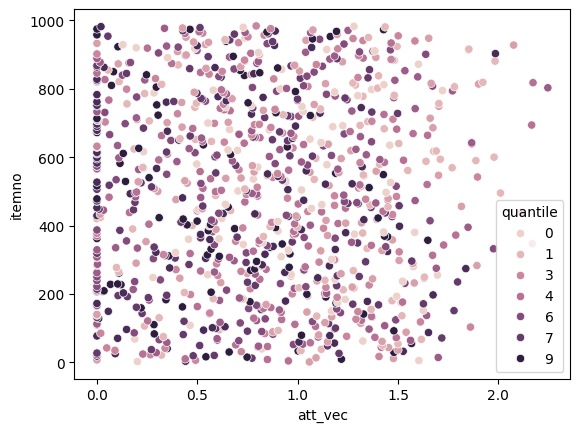

In [43]:
sns.scatterplot(data=df,x='att_vec',y='itemno',hue='quantile')

In [44]:
# beta = params['beta_enc']
# b = np.log(1/beta - 1)
# def cal_att_beta(x):
#     if x.att_vec <= 0:
#         tmp = 0.15
#     else:
#         tmp = 1 / (1 + np.exp(x.att_vec + b))
#     return tmp
# df['att_beta'] = df.apply(cal_att_beta, axis = 1)
# df.sort_values(by='freq')

In [45]:
# m = params['m']
# n = params['n']
# p = params['p']
# def cal_att_beta(x):
#     tmp = x.att_vec * params['gamma_fc']
#     return tmp
# df['att_beta'] = df.apply(cal_att_beta, axis = 1)
# df.sort_values(by='freq')

In [46]:
# sns.scatterplot(data=df,x='att_beta',y='itemno',hue='quantile')

In [47]:
# df.groupby("quantile").att_beta.mean()

In [48]:
recs = model.rec_items
rts = model.rec_times
csims = model.recog_similarity
result = np.column_stack((recs,rts,csims))
df_thin.loc[df_thin.session==sess, ['s_resp','s_rt','csim']] = result
df_simu = df_thin.merge(df_test,on=['session','itemno'])
df_simu

,session,itemno,s_resp,s_rt,csim,item,itemno_old,freq,quantile,old
0,0,341,0.0,102.570786,0.126341,FORT,595,411,6,True
1,0,512,1.0,16.631104,0.217305,MANSION,864,156,3,True
2,0,66,0.0,254.648880,0.080874,BENCH,121,345,6,True
3,0,386,0.0,356.865265,0.064001,GUARD,667,658,7,False
4,0,57,0.0,18.838428,0.211074,BEE,112,185,4,True
...,...,...,...,...,...,...,...,...,...,...
195,0,960,1.0,17.512445,0.214723,WHEAT,1602,527,7,True
196,0,518,1.0,93.382210,0.131034,MATCH,878,775,7,True
197,0,623,1.0,3.189609,0.299874,PENCIL,1042,276,5,True
198,0,556,1.0,6.022444,0.268094,MULE,931,82,2,True


In [49]:
df_simu.groupby(["old","quantile"]).csim.mean()

old    quantile
False  0           0.180941
       1           0.194910
       2           0.197027
       3           0.193573
       4           0.159927
       5           0.180281
       6           0.169632
       7           0.131421
       8           0.156181
       9           0.165837
True   0           0.256619
       1           0.264387
       2           0.205729
       3           0.224656
       4           0.226099
       5           0.232058
       6           0.188864
       7           0.236310
       8           0.211376
       9           0.206630
Name: csim, dtype: float64

In [50]:
# df["s_mean"] = np.mean(s_mat,axis=1)
# df["log_freq"] = np.log(df["freq"])
# df

In [51]:
# # verified
# print('all nos \n',model.all_nos_unique)
# print('pres nos \n', model.pres_nos)
# print('pres index \n',model.pres_indexes)
# print(model.nitems_unique)
# print(model.nelements)
# print(model.distractor_idx)
# print('cue nos \n', model.cues_nos)
# print('cue index \n', model.cues_indexes)